# Three variable Monte-Carlo exponential function integral


In [149]:
# TODO:
# * beta is inaccurate & mass-dep: testing exponential mass function
# * formula is incorrect: 
# - testing r = 0 case
# - testing sigma_zeta = 0 => 2 observable case
# * numerical inaccuracy of PDF
# - testing 1D pdf (2 observables)
# <Sigma | lambda> = … 
# integration over lambda


In [150]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.integrate as integrate
from tqdm import tqdm,trange
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading exponential mass function.


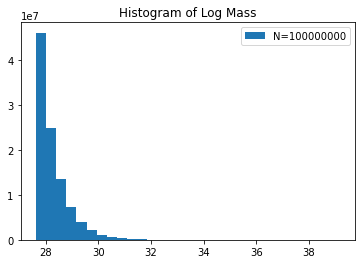

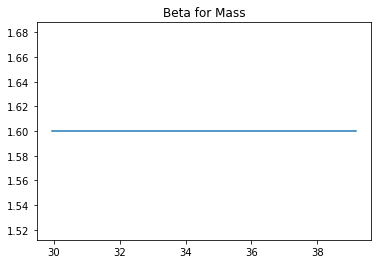

In [151]:
from mass_function import MassFunction

mf = MassFunction(kind="exponential")

# Richness scaling relations


In [152]:
from scaling_relation import ScalingRelation

sr = ScalingRelation()

self.alpha_lam=0.939, self.pi_lam=-27.547425726070088, self.scatter_lam=0.36
self.alpha_SZ=1.519, self.pi_SZ=-50.085787147359696, self.scatter_SZ=0.152
self.alpha_Mwl=1, self.pi_Mwl=0, self.scatter_Mwl=0.5


# MonteCarlo

First, Monte Carlo from the covariance matrix and the mean. How does this work?

Second, define a narrow richness bin to mimic the distribution of halo mass given richness. The expectation value given no correlation should be
$$\frac{\lambda-\pi_{\lambda}}{\alpha_{\lambda}}$$

But the downward correction is
$$-(\frac{\sigma_\lambda}{\alpha})^2 \beta$$

Third,


In [153]:
color_list = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'tab:cyan', "gold"]


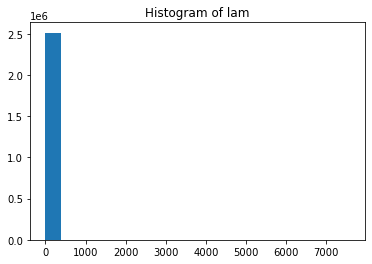

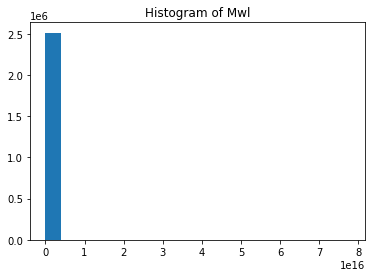

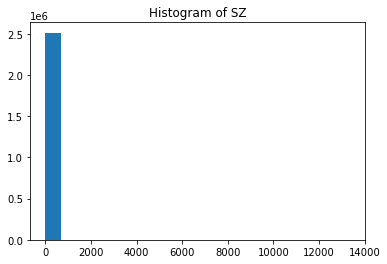

In [154]:
from monte_carlo_observable import MonteCarloObservables

mco = MonteCarloObservables(mass_function=mf,
                            scaling_relation=sr,
                            r=0.5,
)

In [157]:
kwargs, lam_list,sz_list,diff_list,count_list = mco.verify_theory_mean_mwl_given_lam_sz_bin(lam1=1,
                                            lam2=50,
                                            sz_threshold=4,
                                            bin_numbers=[2,5,10])

/global/homes/z/zchusre/.conda/envs/spt_selection/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/global/homes/z/zchusre/.conda/envs/spt_selection/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Statistics for 2 bins
count_list[i]=array([[2.448213e+06, 4.000000e+00],
       [2.139200e+04, 1.960000e+02]])
diff_list[i]=array([[-0.00480145, -0.30792678],
       [ 0.00175615,  0.01036794]])
---------------------------------------
Statistics for 5 bins
count_list[i]=array([[2.343254e+06, 0.000000e+00],
       [9.111800e+04, 1.000000e+00],
       [2.209800e+04, 1.100000e+01],
       [8.749000e+03, 4.500000e+01],
       [4.386000e+03, 1.430000e+02]])
diff_list[i]=array([[-5.01645808e-03,             nan],
       [-8.36356014e-05, -9.08275948e-01],
       [-6.68908281e-04,  4.89756702e-02],
       [ 6.41520335e-04, -2.12821365e-02],
       [ 1.23626040e-02,  1.48786631e-02]])
---------------------------------------
Statistics for 10 bins
count_list[i]=array([[2.097575e+06, 0.000000e+00],
       [2.456790e+05, 0.000000e+00],
       [6.435400e+04, 0.000000e+00],
       [2.676400e+04, 1.000000e+00],
       [1.384100e+04, 3.000000e+00],
       [8.257000e+03, 8.000000e+00],
       [5.18800

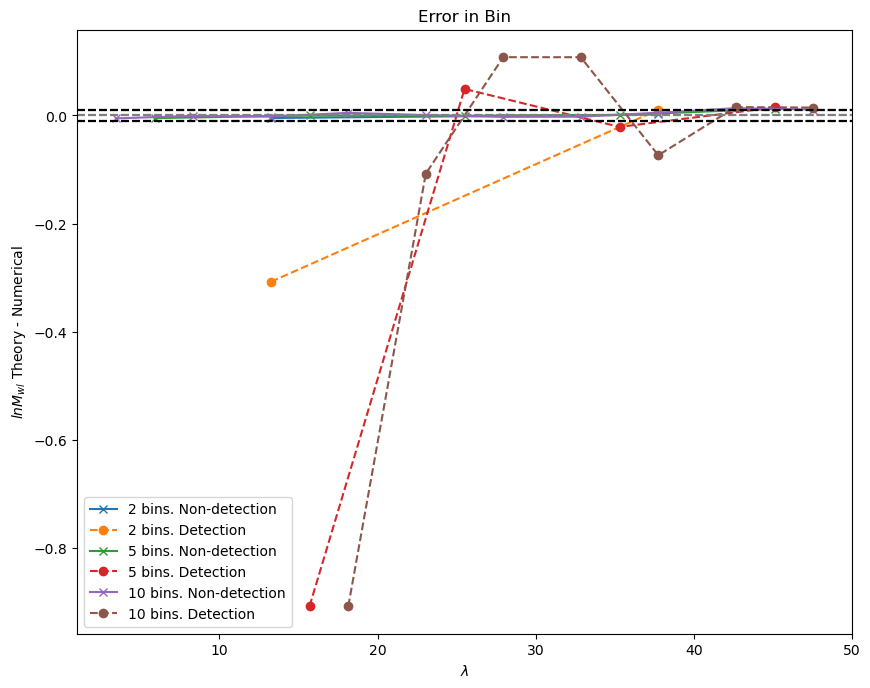

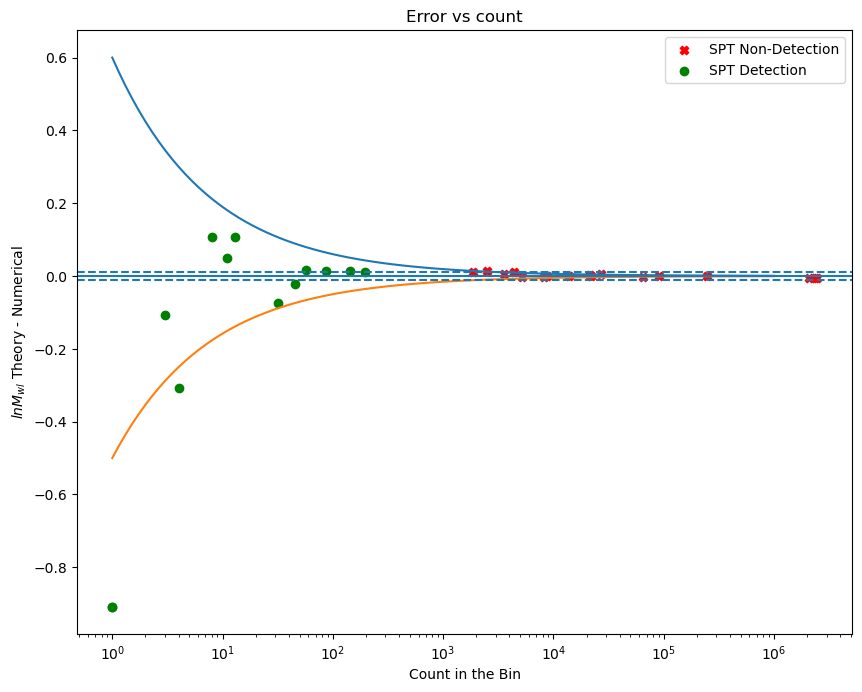

In [158]:
mco.plot_diff_by_bin_numbers(lam_list,sz_list,diff_list,count_list,**kwargs)